## Banking Marketing Campaign
### Business Insight

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

### Description of the problem

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

In [8]:
# Descarga del dataset

!pip install ucimlrepo
import pandas as pd

from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
#y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri 

## EXPLORATORY DATA ANALYSIS

In [9]:
df = pd.DataFrame(X)
df["y"] = y
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [10]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(45211, 17)

El dataset esta compuesto por 45211 registros que contienen información en 17 columnas, de las cuales:
- La variable a predecir es y, pues representa a las personas que tendrían un depósito a largo plazo
- De las variables, 7 son numéricas, 10 categóricas.
- La variable poutcome tiene unicamente 8252 registros de los 45211, por lo que no se considerara para el EDA.
- La variable contact tiene más de 8000 registros faltantes, por lo que se considerara su inclusión dentro del dataset.
- Las 15 variables restantes cuentan con los registros completos



In [11]:
#Eliminacion de duplicados
df.drop_duplicates
df.shape

(45211, 17)

Después de un análisis, se llegó al consenso de eliminar las siguientes variables, pues se determinó que podrían no proveer información relevante o afectar los resultados por sus faltantes:
- contact
- day_of_week
- outcome

In [12]:
#Eliminacion de datos irrelevantes
try:
    df.drop(["contact", "day_of_week", "poutcome"], axis = 1, inplace = True)
    df.head()
except:
    print("already deleted")

## Analysis of univariate variables

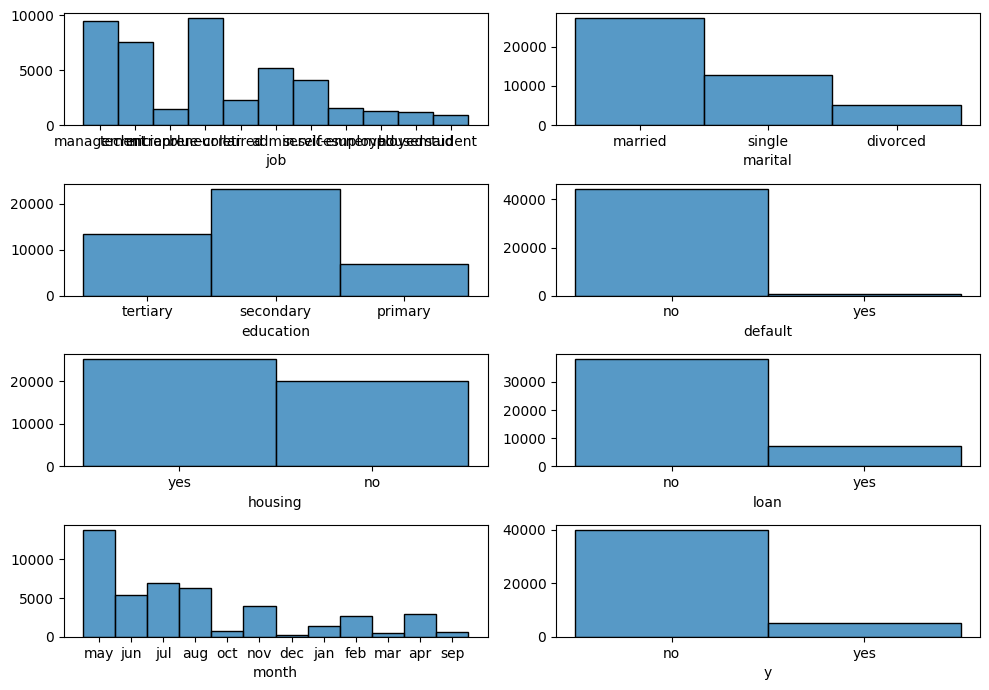

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = df, x = "job").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = df, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "education").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = df, x = "default").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = df, x = "housing").set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = df, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = df, x = "month").set(ylabel = None)
sns.histplot(ax = axis[3, 1], data = df, x = "y").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

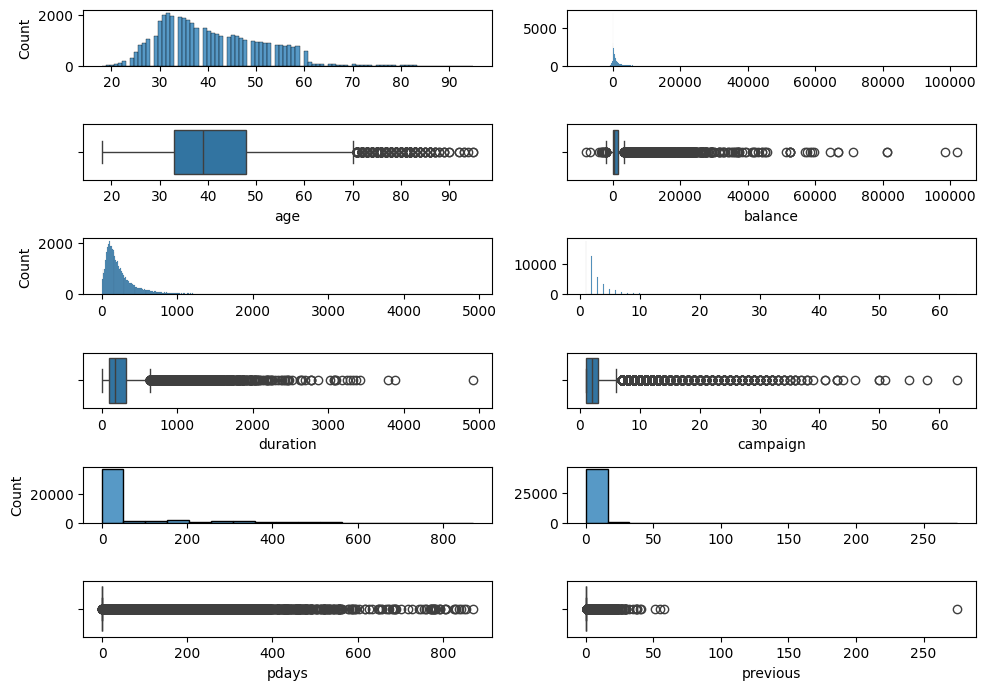

In [14]:
fig, axis = plt.subplots(6, 2, figsize = (10, 7))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "balance").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "balance")
sns.histplot(ax = axis[2, 0], data = df, x = "duration").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "duration")
sns.histplot(ax = axis[2, 1], data = df, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "campaign")
sns.histplot(ax = axis[4, 0], data = df, x = "pdays").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x = "pdays")
sns.histplot(ax = axis[4, 1], data = df, x = "previous").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "previous")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [15]:
df["y"] = pd.factorize(df["y"])[0]
df["y"].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

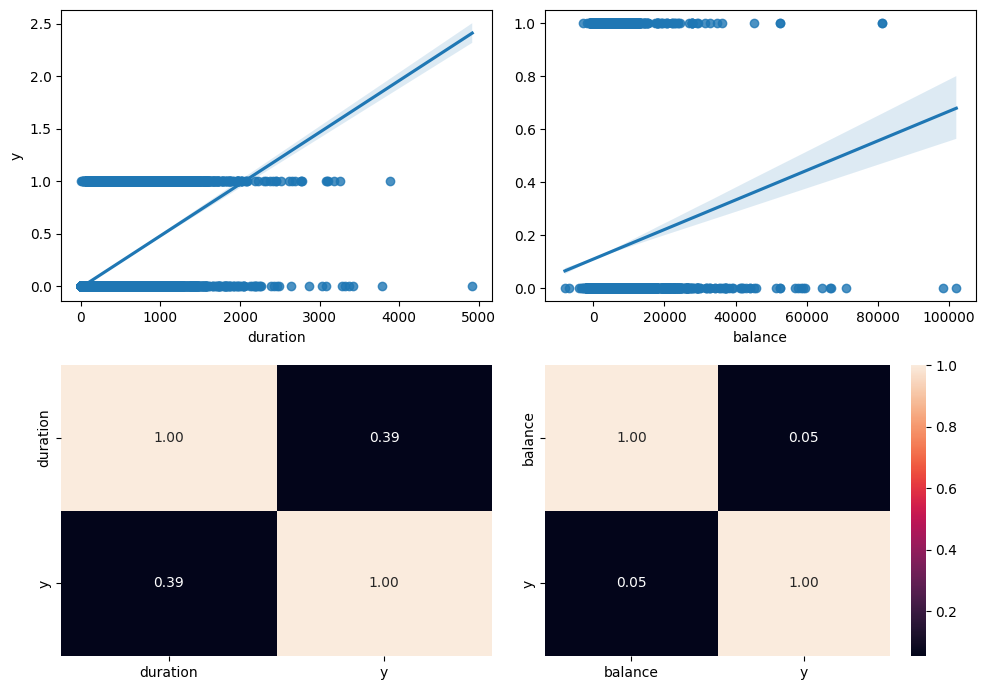

In [16]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "duration", y = "y")
sns.heatmap(df[["duration", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "balance", y = "y").set(ylabel=None)
sns.heatmap(df[["balance", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Como se puede apreciar en los gráficos obtenidos, existe una relación muy debil entre la variable objetivo y el balance en las cuentas, por lo cuál el balance no tendría un gran impacto en la decisión de tener un depósito a largo plazo; en cuanto a la duración de las llamadas y la variable objetivo y, la relación es más fuerte pero no lo suficiente para indicar un gran impacto. De esto podemos inferir que las personas que pasan más tiempo al teléfono con los agentes tienen más chances de aceptar el depósito a largo plazo, pero no es significativo 

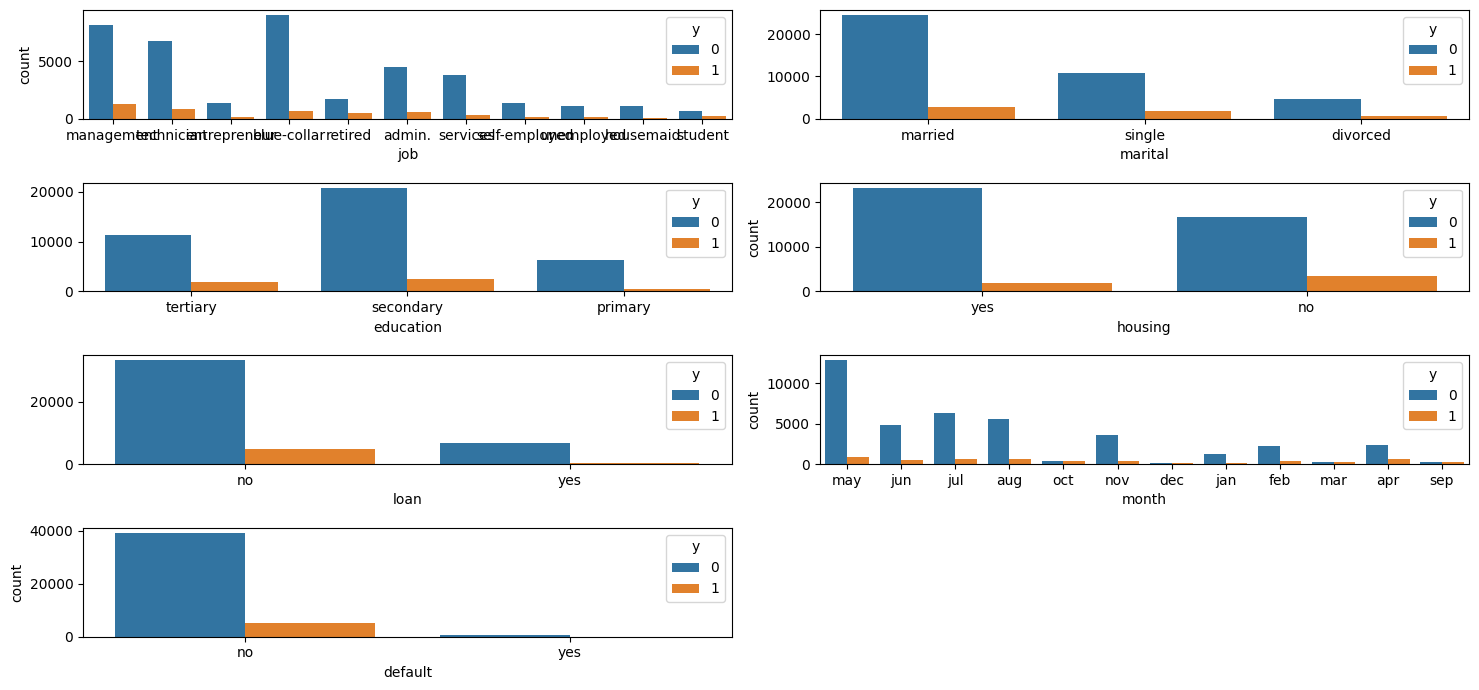

In [17]:
fig, axis = plt.subplots(4, 2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = df, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = df, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 1], data = df, x = "housing", hue = "y")
sns.countplot(ax = axis[2, 0], data = df, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 1], data = df, x = "month", hue = "y")
sns.countplot(ax = axis[3, 0], data = df, x = "default", hue = "y")


plt.tight_layout()
fig.delaxes(axis[3, 1])

plt.show()

Las gráficas obtenidas nos muestran lo siguiente:
- Las personas cuyo empleo es manager son más propensas a aceptar el depósito a largo plazo, aunque la relación sigue siendo debil.
- Una persona casada considera más la opción a largo plazo que una soltera o divorciada, aunque la diferencia de aceptación no es muy grande.

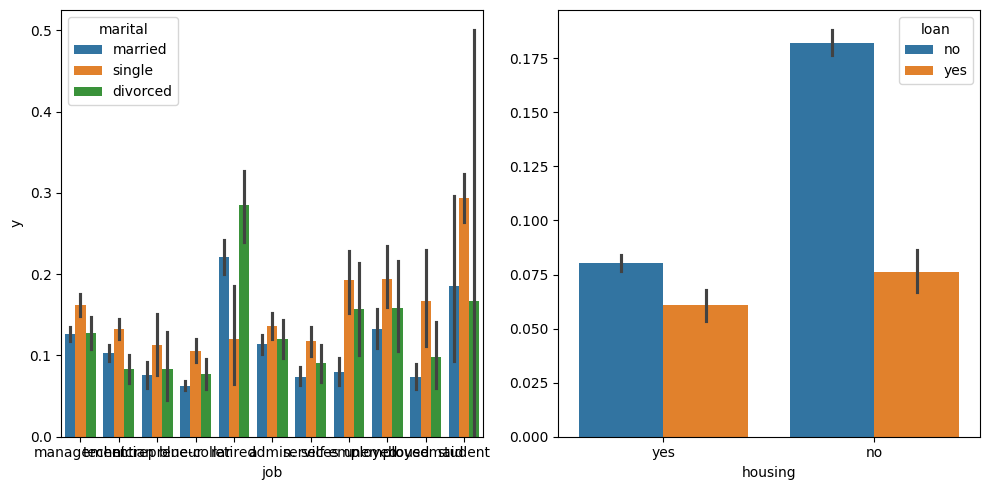

In [18]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = df, x = "job", y = "y", hue = "marital")
sns.barplot(ax = axis[1], data = df, x = "housing", y = "y", hue = "loan").set(ylabel = None)

plt.tight_layout()

plt.show()

In [19]:
#Conversion de categoricos a numericos

df["job"] = pd.factorize(df["job"])[0]
df["marital"] = pd.factorize(df["marital"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["housing"] = pd.factorize(df["housing"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["month"] = pd.factorize(df["month"])[0]
df["default"] = pd.factorize(df["default"])[0]

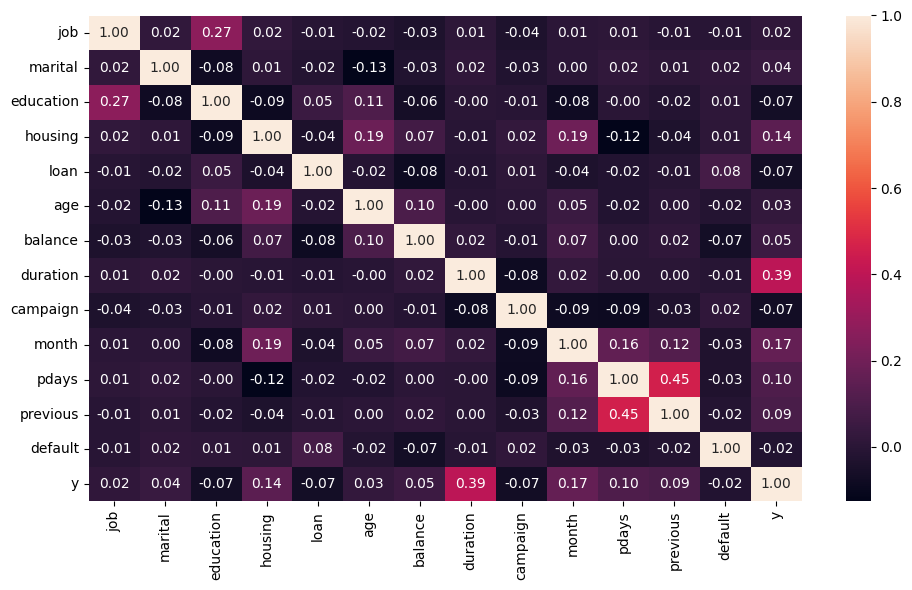

In [20]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["job", "marital", "education", "housing", "loan", "age", "balance", "duration", "campaign", "month","pdays", "previous","default","y" ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

En el heatmap se puede observar que no hay ninguna variable que tenga una relación que pueda considerarse fuerte o de gran impacto respecto a la variable objetivo (y), sin embargo, se tomarán las variables cuya relación sobresalga entre las demás, ya sea negativa o positiva.
Después de considerarse, se ha decidido descartar las variables cuya relación es menor a 0.05 o -0.05

In [21]:
try:
    df.drop(["job", "marital", "age","default"], axis = 1, inplace = True)
    df.head()
except:
    print("already deleted")

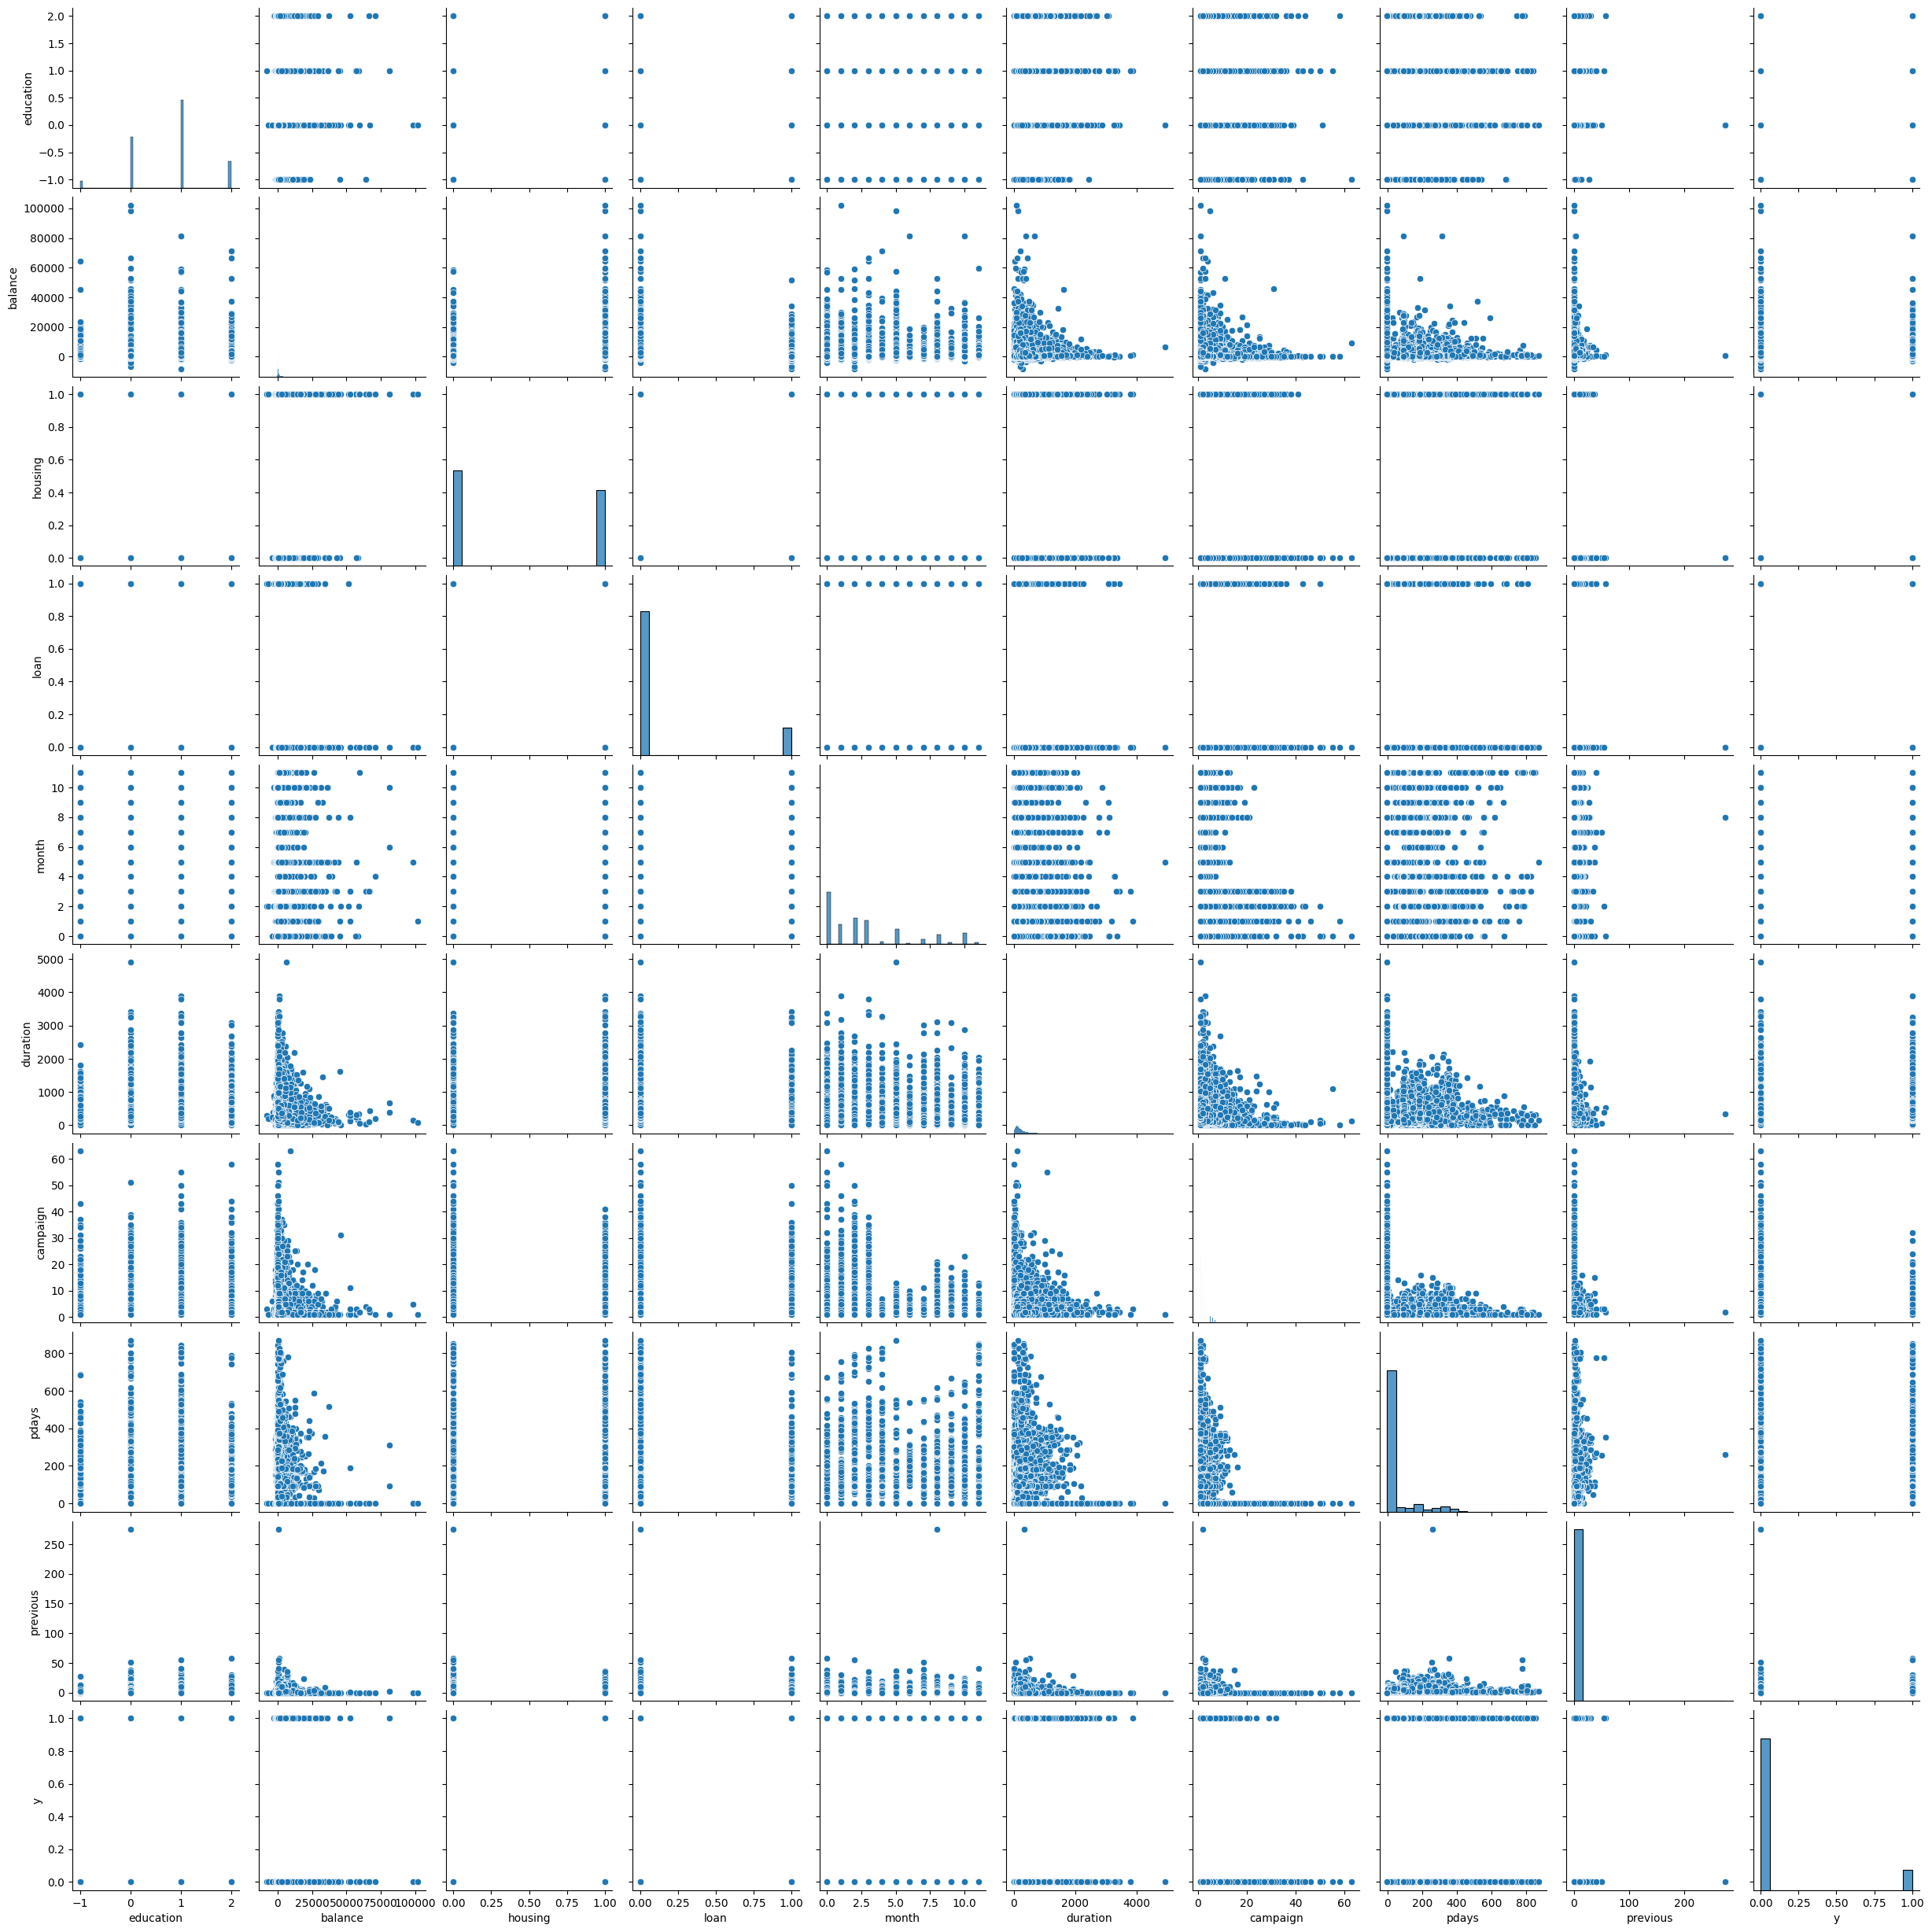

In [22]:
sns.pairplot(data = df)

In [23]:
df.describe()

,education,balance,housing,loan,month,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.775187,1362.272058,0.444162,0.160226,2.940722,258.163080,2.763841,40.197828,0.580323,0.116985
std,0.747997,3044.765829,0.496878,0.366820,3.179741,257.527812,3.098021,100.128746,2.303441,0.321406
min,-1.000000,-8019.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,0.000000,72.000000,0.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,1.000000,448.000000,0.000000,0.000000,2.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,1.000000,1428.000000,1.000000,0.000000,5.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,2.000000,102127.000000,1.000000,1.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


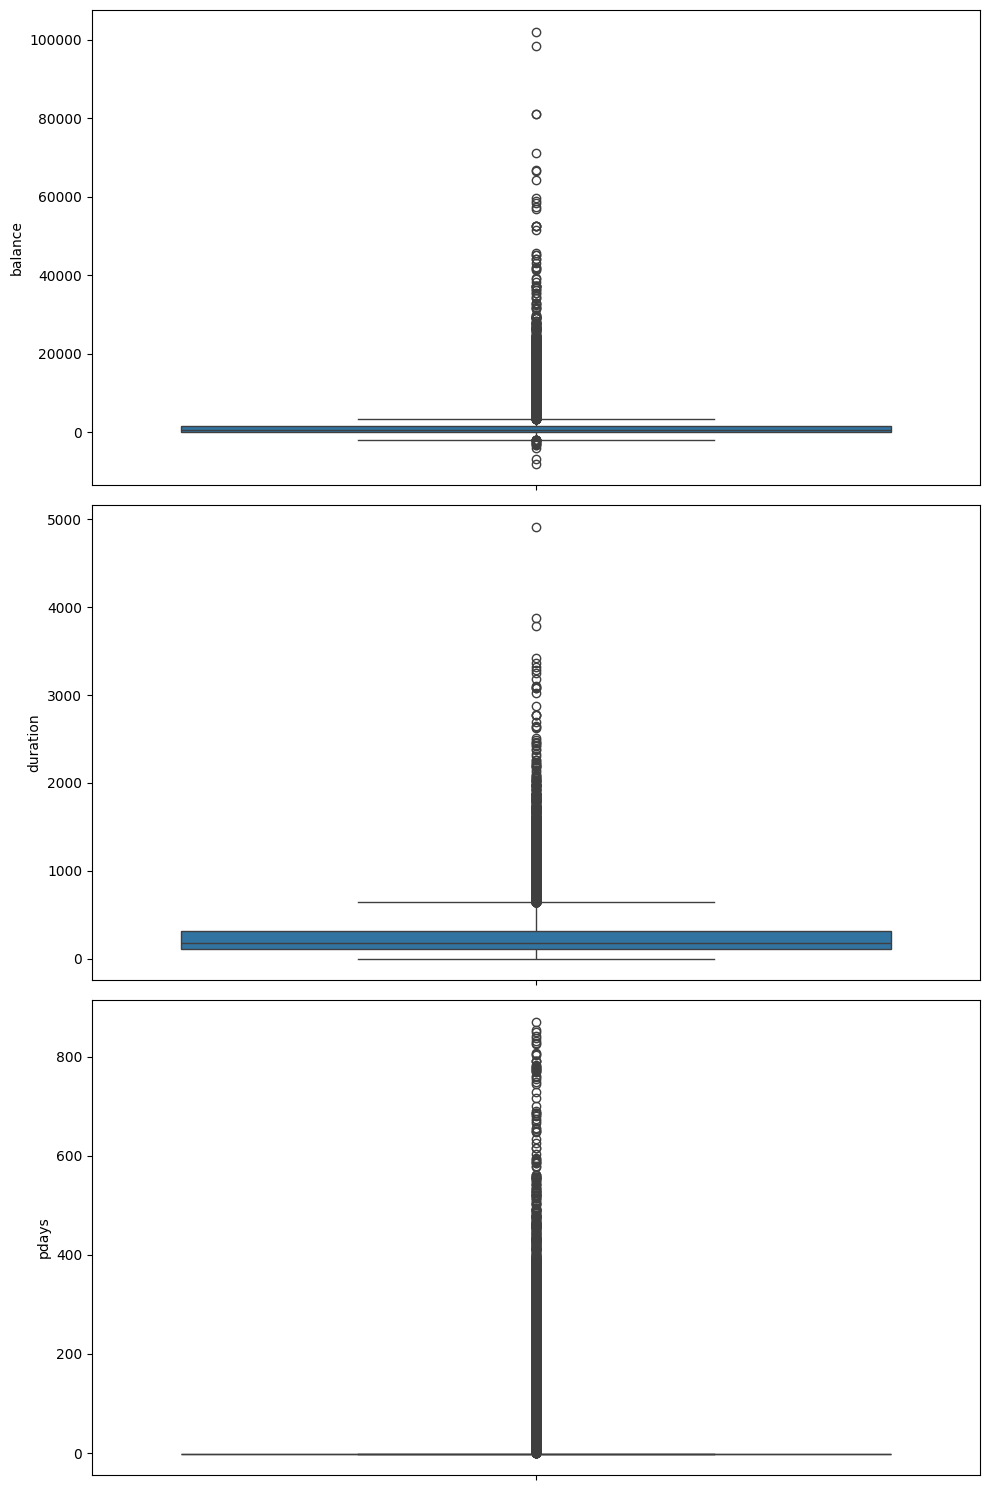

In [24]:
fig, axis = plt.subplots(3, figsize = (10, 15))

sns.boxplot(ax = axis[0], data = df, y = "balance")
sns.boxplot(ax = axis[1], data = df, y = "duration")
sns.boxplot(ax = axis[2], data = df, y = "pdays")

plt.tight_layout()

plt.show()

Como se puede observar en los gráficos, hay varios valores fuera de la media, por lo que se realizará el procesamiento de outliers

In [25]:
balance_stats = df["balance"].describe()
balance_stats

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [26]:
balance_iqr = balance_stats["75%"] - balance_stats["25%"]
upper_limit = balance_stats["75%"] + 1.5 * balance_iqr
lower_limit = balance_stats["25%"] - 1.5 * balance_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(balance_iqr, 2)}")

The upper and lower limits for finding outliers are 3462.0 and -1962.0, with an interquartile range of 1356.0


In [27]:
df[df["balance"] > 3462]

,education,balance,housing,loan,month,duration,campaign,pdays,previous,y
34,0,10635,0,0,0,336,1,-1,0,0
65,0,6530,0,0,0,91,1,-1,0,0
69,1,12223,0,1,0,177,1,-1,0,0
70,1,5935,0,1,0,258,1,-1,0,0
186,-1,4384,0,0,0,315,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45164,0,4655,1,0,5,111,2,-1,0,0
45181,1,6879,1,0,5,74,2,118,3,0
45185,0,4256,0,0,5,200,1,92,4,1
45191,0,3810,0,0,5,262,1,183,1,1


In [28]:
df[df["balance"] < -1962]

,education,balance,housing,loan,month,duration,campaign,pdays,previous,y
1896,0,-3313,0,1,0,153,1,-1,0,0
7413,0,-3372,0,0,0,386,2,-1,0,0
7756,0,-2049,0,0,0,169,3,-1,0,0
11655,0,-1968,1,0,1,60,3,-1,0,0
12909,1,-8019,1,1,2,299,3,-1,0,0
13687,1,-2093,0,1,2,120,3,-1,0,0
13708,1,-1965,1,1,2,317,2,-1,0,0
14434,0,-2282,0,1,2,301,6,-1,0,0
15682,0,-6847,1,1,2,206,1,-1,0,0
17159,1,-2082,1,1,2,123,6,-1,0,0


Como se puede apreciar, eliminar el límite superior descarta la mayor parte de los registros, sin embargo, podemos eliminar el límite inferior sin problema

In [29]:
df = df[df["balance"] > -1962]

In [30]:
df.describe

<bound method NDFrame.describe of        education  balance  housing  loan  month  duration  campaign  pdays  \
0              0     2143        0     0      0       261         1     -1   
1              1       29        0     0      0       151         1     -1   
2              1        2        0     1      0        76         1     -1   
3             -1     1506        0     0      0        92         1     -1   
4             -1        1        1     0      0       198         1     -1   
...          ...      ...      ...   ...    ...       ...       ...    ...   
45206          0      825        1     0      5       977         3     -1   
45207          2     1729        1     0      5       456         2     -1   
45208          1     5715        1     0      5      1127         5    184   
45209          1      668        1     0      5       508         4     -1   
45210          1     2971        1     0      5       361         2    188   

       previous  y  
0       

In [31]:
duration_stats = df["duration"].describe()
duration_stats

count    45194.000000
mean       258.152564
std        257.538385
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [32]:
duration_iqr = duration_stats["75%"] - duration_stats["25%"]
upper_limit = duration_stats["75%"] + 1.5 * duration_iqr
lower_limit = duration_stats["25%"] - 1.5 * duration_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(duration_iqr, 2)}")

The upper and lower limits for finding outliers are 643.0 and -221.0, with an interquartile range of 216.0


In [33]:
df[df["duration"] > 643]

,education,balance,housing,loan,month,duration,campaign,pdays,previous,y
37,1,-3,1,0,0,1666,1,-1,0,0
43,1,529,0,0,0,1492,1,-1,0,0
53,1,-76,0,0,0,787,1,-1,0,0
59,2,179,0,0,0,1778,1,-1,0,0
61,1,989,0,0,0,812,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45124,2,232,0,0,4,701,2,-1,0,1
45199,1,1475,0,0,5,1166,3,530,12,0
45200,1,557,0,0,5,1556,4,-1,0,1
45206,0,825,1,0,5,977,3,-1,0,1


In [34]:
df[df["duration"] > -221]

,education,balance,housing,loan,month,duration,campaign,pdays,previous,y
0,0,2143,0,0,0,261,1,-1,0,0
1,1,29,0,0,0,151,1,-1,0,0
2,1,2,0,1,0,76,1,-1,0,0
3,-1,1506,0,0,0,92,1,-1,0,0
4,-1,1,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,0,825,1,0,5,977,3,-1,0,1
45207,2,1729,1,0,5,456,2,-1,0,1
45208,1,5715,1,0,5,1127,5,184,3,1
45209,1,668,1,0,5,508,4,-1,0,0


Esta vez existe un número considerable en ambos límites, así que se conservan ambos

In [35]:
pdays_stats = df["pdays"].describe()
pdays_stats

count    45194.000000
mean        40.213325
std        100.144388
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [36]:
pdays_iqr = pdays_stats["75%"] - pdays_stats["25%"]
upper_limit = pdays_stats["75%"] + 1.5 * pdays_iqr
lower_limit = pdays_stats["25%"] - 1.5 * pdays_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(pdays_iqr, 2)}")

The upper and lower limits for finding outliers are -1.0 and -1.0, with an interquartile range of 0.0


In [37]:
df[df["pdays"] < -1.0]

,education,balance,housing,loan,month,duration,campaign,pdays,previous,y


Se concluye que pdays no require tratamiento. Dado que las demás variables son categóricas, no se realiza tratamiento

In [38]:
df.isnull().sum().sort_values(ascending=False)

education    0
balance      0
housing      0
loan         0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

num_variables = ["education", "balance", "housing", "loan", "month", "duration", "campaign","pdays","previous"]

# We divide the dataset into training and test samples
X = df.drop("y", axis = 1)[num_variables]
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,education,balance,housing,loan,month,duration,campaign,pdays,previous
18131,0,0,0,1,2,278,3,-1,0
26700,0,8422,0,0,5,166,3,-1,0
4195,0,365,0,0,0,49,2,-1,0
31318,0,2987,1,0,9,103,3,-1,0
4498,2,47,1,0,0,317,1,-1,0


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,education,balance,housing,loan,month,duration,campaign,pdays,previous
18131,-1.037275,-0.445966,-0.889883,2.294783,-0.297023,0.076303,0.075399,-0.412986,-0.245918
26700,-1.037275,2.308191,-0.889883,-0.435771,0.645121,-0.359703,0.075399,-0.412986,-0.245918
4195,-1.037275,-0.326604,-0.889883,-0.435771,-0.925120,-0.815174,-0.246601,-0.412986,-0.245918
31318,-1.037275,0.530841,1.123743,-0.435771,1.901314,-0.604957,0.075399,-0.412986,-0.245918
4498,1.638240,-0.430596,1.123743,-0.435771,-0.925120,0.228126,-0.568601,-0.412986,-0.245918


In [41]:
#X_train_norm["price"] = list(y_train)
#X_test_norm["price"] = list(y_test)

X_train_norm.to_csv("/workspaces/LogisticRegression/data/processed/clean_bank_train.csv", index=False)
X_test_norm.to_csv("/workspaces/LogisticRegression/data/processed/clean_bank_test.csv", index=False)

## Regresión Logística

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_norm, y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(X_test_norm)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(9039,))

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.888815134417524

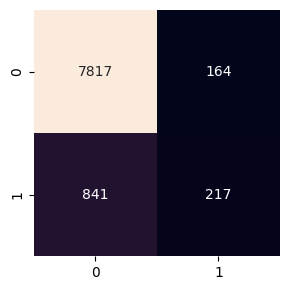

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bank_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

La interpretación de la matriz de confusión es la siguiente:

- True positive (TP): 7817 casos fueron predichos como no (y = no), y la clase real de los mismos fue no.
- True negative (TN): 841 casos fueron predichos como sí (y = yes), y la clase real es sí.
- False positive (FP): 164 casos fueron marcados como no, cuando la clase real correspondía a sí.
- False negative (FN): 217 casos fueron predichos como sí, cuando la clase real correspondía a no.

## Optimización de hiperparámetros

### Grid Search 

In [46]:
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [47]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_norm, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}


In [48]:
model_grid = LogisticRegression(penalty = None, C = 0.001, solver = "newton-cg")
model_grid.fit(X_train_norm, y_train)
y_pred = model_grid.predict(X_test_norm)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy


0.8887045027104769

### Random Search

In [49]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# We define the parameters we want to adjust
hyperparams = {
    "C": np.logspace(-20, 0, 10,100),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the random search
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-20, 1.66810054e-18, 2.78255940e-16, 4.64158883e-14,
       7.74263683e-12, 1.29154967e-09, 2.15443469e-07, 3.59381366e-05,
       5.99484250e-03, 1.00000000e+00]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [50]:
random_search.fit(X_train_norm, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'solver': 'newton-cg', 'penalty': None, 'C': np.float64(7.742636826811278e-12)}


In [51]:
model_random_search = LogisticRegression(penalty = None, C = np.float64(7.742636826811278e-12), solver = "newton-cg")
model_random_search.fit(X_train_norm, y_train)
y_pred = model_random_search.predict(X_test_norm)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.8887045027104769

Después de aplicar GridSearch y RandomSeacrh, no se encontró mejoría en el modelo, sino que su precisión disminuyó, por lo que se concluye que los mejores valores son default en este caso

In [52]:
from pickle import dump

dump(model, open("../models/logistic_regression.sav", "wb"))